In [2]:
import torch 
from d2l import torch as d2l
from torch import nn

In [3]:
alexnet = nn.Sequential( 
            nn.Conv2d( 1, 96 , kernel_size=11  , stride=4 , ),nn.ReLU() ,
            nn.MaxPool2d( kernel_size=3 , stride= 2 ),
            nn.Conv2d( 96 , 256 , kernel_size=5 , padding= 2 ) ,nn.ReLU(),
            nn.MaxPool2d( kernel_size=3 ,  stride= 2),
            nn.Conv2d( 256 , 384 , kernel_size=3 , padding= 1 ) , nn.ReLU(),
            nn.Conv2d( 384 , 384 , kernel_size=3 , padding= 1 ) , nn.ReLU(),
            nn.Conv2d( 384 , 256 , kernel_size=3 , padding= 1 ) , nn.ReLU(),
            nn.MaxPool2d( kernel_size=3  , stride= 2),
            nn.Flatten(),
            nn.Linear( 6400 ,4096 ),nn.ReLU(),
            nn.Dropout( p=0.5),
            nn.Linear( 4096 , 4096 ),nn.ReLU(),
            nn.Dropout( p=0.5 ),
            nn.Linear( 4096 , 10 )

 )

In [4]:
x = torch.rand( 1,1,224,224 )
for layer in alexnet:
    x = layer(x)
    print( layer.__class__.__name__,'ouput：',x.shape )

Conv2d ouput： torch.Size([1, 96, 54, 54])
ReLU ouput： torch.Size([1, 96, 54, 54])
MaxPool2d ouput： torch.Size([1, 96, 26, 26])
Conv2d ouput： torch.Size([1, 256, 26, 26])
ReLU ouput： torch.Size([1, 256, 26, 26])
MaxPool2d ouput： torch.Size([1, 256, 12, 12])
Conv2d ouput： torch.Size([1, 384, 12, 12])
ReLU ouput： torch.Size([1, 384, 12, 12])
Conv2d ouput： torch.Size([1, 384, 12, 12])
ReLU ouput： torch.Size([1, 384, 12, 12])
Conv2d ouput： torch.Size([1, 256, 12, 12])
ReLU ouput： torch.Size([1, 256, 12, 12])
MaxPool2d ouput： torch.Size([1, 256, 5, 5])
Flatten ouput： torch.Size([1, 6400])
Linear ouput： torch.Size([1, 4096])
ReLU ouput： torch.Size([1, 4096])
Dropout ouput： torch.Size([1, 4096])
Linear ouput： torch.Size([1, 4096])
ReLU ouput： torch.Size([1, 4096])
Dropout ouput： torch.Size([1, 4096])
Linear ouput： torch.Size([1, 10])


In [5]:
batch_size = 256
train_iter , test_iter = d2l.load_data_fashion_mnist( batch_size ,resize=224 )

training on cuda:0


KeyboardInterrupt: 

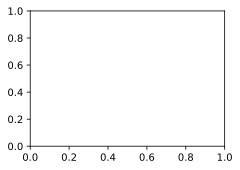

In [6]:
lr , num_epochs = 0.01 , 10
d2l.train_ch6( alexnet , train_iter ,test_iter , num_epochs , lr , d2l.try_gpu() )